##  Machine Learning 
### PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
bankruptcy = pd.read_csv('../data/bankruptcy.csv', index_col='Company')

In [3]:
features = bankruptcy.loc[:, bankruptcy.columns != 'Bankrupt']
target =  bankruptcy.Bankrupt


___

Se crea el objeto con el numero de componentes que nos interese

In [4]:
pca = PCA(n_components=5)

In [5]:
pca = pca.fit(features)

In [6]:
# Las transformaciones lineales que representan las componentes
pd.DataFrame(pca.components_, columns=features.columns)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
0,-0.128789,-0.976635,-0.165546,-0.046635,-0.004195
1,-0.795211,0.045336,0.189930,0.573826,-0.015316
2,0.513391,-0.058777,-0.280471,0.808893,-0.001641
3,0.295234,-0.201678,0.926050,0.119099,0.020222
4,-0.017854,0.000579,-0.016978,0.007515,0.999668


In [7]:
pc_labels = [f'pc{i+1}' for i in range(len(features.columns))]

In [8]:
var_exp = pd.Series(pca.explained_variance_ratio_,
                    index=pc_labels)

Mostramos el porcentaje de varianza explicada por cada componente principal

<AxesSubplot:>

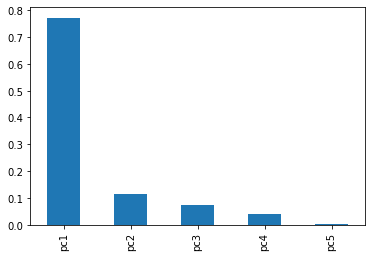

In [9]:
var_exp.plot.bar()

Al aplicar la transformación obtenemos una nueva representación a partir
de las componentes principales

In [10]:
feat_pca = pca.transform(features)
feat_pca_df = pd.DataFrame(feat_pca, columns=pc_labels)
feat_pca_df.head()

,pc1,pc2,pc3,pc4,pc5
0,-44.854573,-17.385834,-27.773698,-2.900858,0.280483
1,4.377977,-53.520011,-11.435258,5.623700,0.191986
2,159.446127,-2.673019,-16.554409,-22.837595,-1.831227
3,371.805198,-21.089323,12.213330,76.217334,-1.340131
4,3.584537,-11.842328,27.298125,-5.848082,-2.153240


Confirmamos que en la nueva representación las características no están correladas

In [11]:
feat_pca_df.corr().round(3)

,pc1,pc2,pc3,pc4,pc5
pc1,1.0,-0.0,0.0,0.0,0.0
pc2,-0.0,1.0,-0.0,0.0,-0.0
pc3,0.0,-0.0,1.0,0.0,-0.0
pc4,0.0,0.0,0.0,1.0,0.0
pc5,0.0,-0.0,-0.0,0.0,1.0


In [12]:
features.corr().round(3)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
WC/TA,1.000,0.315,-0.004,-0.164,0.114
RE/TA,0.315,1.000,0.549,0.133,0.066
EBIT/TA,-0.004,0.549,1.000,0.084,0.071
S/TA,-0.164,0.133,0.084,1.000,-0.054
BVE/BVL,0.114,0.066,0.071,-0.054,1.000


___

### Reducción de dimensiones 
En este caso seleccionamos solo 2 componentes para 
hacer una representación gráfica de los datos


In [13]:
pca2 = PCA(n_components=2)

In [14]:
pca_feat = pca2.fit_transform(features)

In [15]:
pca_feat_df = pd.DataFrame(pca_feat,
                           columns=['PC1','PC2'],
                           index=features.index)


In [16]:
pca_feat_df.head()

,PC1,PC2
Company,,
360Networks,-44.854573,-17.385834
Advanced Radio Telecom,4.377977,-53.520011
Ardent Communications,159.446127,-2.673019
At Home Corp.,371.805198,-21.089323
Convergent Communications,3.584537,-11.842328


Text(0, 0.5, 'PC2')

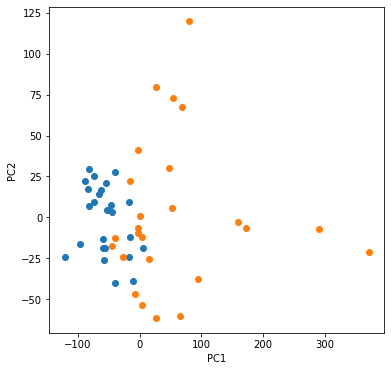

In [17]:
x_no = pca_feat_df[target == 'no']
x_yes = pca_feat_df[target == 'yes']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_no.PC1, x_no.PC2)
ax.scatter(x_yes.PC1, x_yes.PC2)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')



____